In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from pandas import read_csv
import scipy.fftpack
import pywt
import os
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy as sp
import flyingcircus as fc
import scipy.stats


In [28]:
#Load Vibration data 
folder1 = 'C:\\4PUMPS_EXPERIMENT_JUL2019\\'
os.chdir(folder1)
dfp1 = pd.read_csv('cont_p1_z_vib61.csv')
dfp2 = pd.read_csv('Visc_p2_z_vib61.csv')
dfp3 = pd.read_csv('Clog_p3_z_vib61.csv')
dfp4 = pd.read_csv('Norm_p4_z_vib61.csv')
dfp5 = pd.read_csv('Visc-p5-vib61.csv')

#Load Temperature data 
folder2 = 'C:\\4PUMPS_EXPERIMENT_JUL2019\\tEMPERATURE DATA\\'
os.chdir(folder2)
temp_dfp1 = pd.read_csv('temp_n012_p1.csv')
temp_dfp2 = pd.read_csv('temp_n012_p2.csv')
temp_dfp3 = pd.read_csv('temp_n012_p3.csv')
temp_dfp4 = pd.read_csv('temp_n012_p4.csv')


print('dataframe of pump 1 is: ', dfp1.head())
print('dataframe of pump 2 is: ', dfp2.head())
print('dataframe of pump 3 is: ', dfp3.head())
print('dataframe of pump 4 is: ', dfp4.head())
print('dataframe of pump 5 is: ', dfp5.head())
os.getcwd()

dataframe of pump 1 is:                      Date    values
0  11/19/2019 5:12:45 PM  0.771588
1  11/19/2019 5:12:46 PM -2.287077
2  11/19/2019 5:12:46 PM  0.228165
3  11/19/2019 5:12:46 PM  0.637999
4  11/19/2019 5:12:46 PM  0.206210
dataframe of pump 2 is:                      Date    values
0  11/19/2019 5:12:45 PM  0.421649
1  11/19/2019 5:12:46 PM -1.690217
2  11/19/2019 5:12:46 PM  0.437927
3  11/19/2019 5:12:46 PM -0.300075
4  11/19/2019 5:12:46 PM  0.810032
dataframe of pump 3 is:                      Date    values
0  11/19/2019 5:12:45 PM  0.435936
1  11/19/2019 5:12:46 PM -1.317961
2  11/19/2019 5:12:46 PM  0.093179
3  11/19/2019 5:12:46 PM  0.085941
4  11/19/2019 5:12:46 PM  0.184479
dataframe of pump 4 is:                      Date    values
0  11/19/2019 5:12:45 PM -0.737166
1  11/19/2019 5:12:46 PM -0.798829
2  11/19/2019 5:12:46 PM  0.227705
3  11/19/2019 5:12:46 PM -0.438919
4  11/19/2019 5:12:46 PM  0.455151
dataframe of pump 5 is:                      Date    values


'C:\\4PUMPS_EXPERIMENT_JUL2019\\tEMPERATURE DATA'

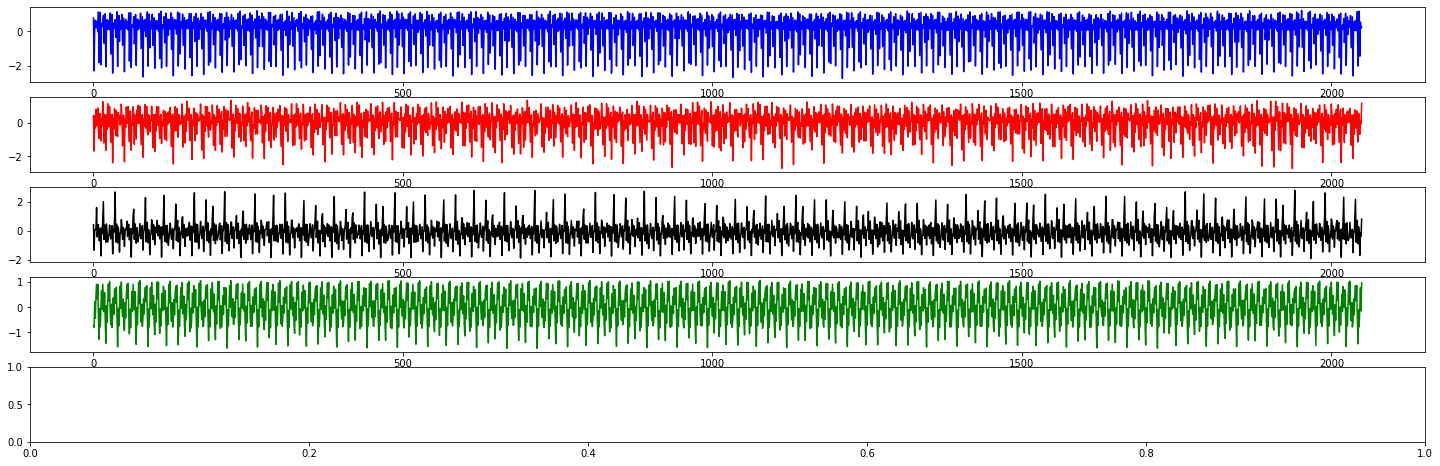

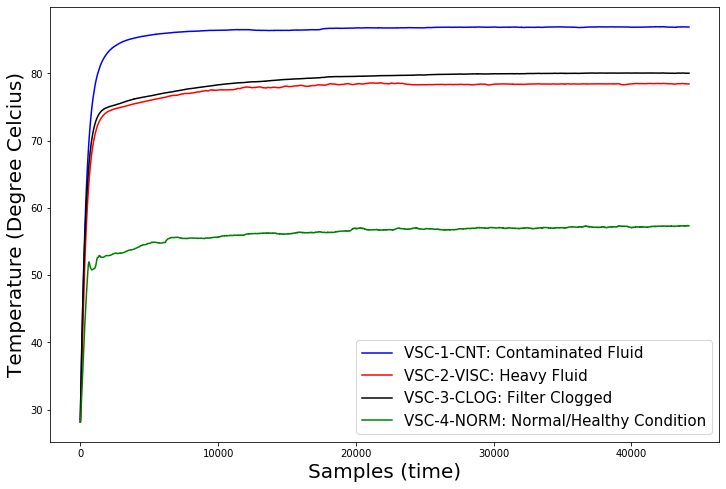

(4943,)

In [30]:
#vIBRATION analysis and monitoring
f1 = dfp1['values'].values#
f2 = dfp2['values'].values#
f3 = dfp3['values'].values##
f4 = dfp4['values'].values#

#Temperature analysis and monitoring
t1 = temp_dfp1['values'].values#
t2 = temp_dfp2['values'].values#
t3 = temp_dfp3['values'].values##
t4 = temp_dfp4['values'].values#

#visualise the vibration data
figure, ((ax1), (ax2), (ax3), (ax4),(ax5)) =plt.subplots(nrows=5, ncols=1, figsize=(25,8))
ax1.plot(f1.T[:2050], color = 'b')
ax2.plot(f2.T[:2050], color = 'r')
ax3.plot(f3.T[:2050], color = 'k')
ax4.plot(f4.T[:2050], color = 'g')
plt.show()

#visualise the temperature data
plt.figure(figsize=(12,8))
plt.plot(t1,  label='VSC-1-CNT: Contaminated Fluid',color = 'b')
plt.plot(t2,  label='VSC-2-VISC: Heavy Fluid',color = 'r')
plt.plot(t3,  label='VSC-3-CLOG: Filter Clogged', color = 'k')
plt.plot(t4,  label='VSC-4-NORM: Normal/Healthy Condition', color = 'g')
plt.xlabel('Samples (time)', fontsize=20)
plt.ylabel('Temperature (Degree Celcius)', fontsize=20)
plt.legend(loc = 'best', fontsize = 15)
plt.show()

f1.shape

In [31]:
#source the values from the data
p1 = dfp1['values'].values#
p2 = dfp2['values'].values#
p3 = dfp3['values'].values##
p4 = dfp4['values'].values#
p5 = dfp5['values'].values#

#select few first samples from each signal as training Data
p1 = p1[:1000]
p2 = p2[:1000]
p3 = p3[:1000]
p4 = p4[:1000]



MFCC:
Number of windows P1 = 99

MFCC:
Number of windows P2= 99

MFCC:
Number of windows P3= 99

MFCC:
Number of windows P4= 99
Length of each feature  P1= 13
Length of each feature  P2 = 13
Length of each feature  P3= 13
Length of each feature  P4= 13

Filter bank:
Number of windows  P1 = 99

Filter bank:
Number of windows  P2 = 99

Filter bank:
Number of windows  P3 = 99

Filter bank:
Number of windows  P4 = 99
Length of each feature  P1 = 26
Length of each feature  P2 = 26
Length of each feature  P3 = 26
Length of each feature  P4 = 26


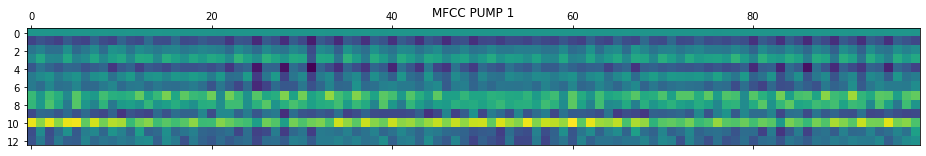

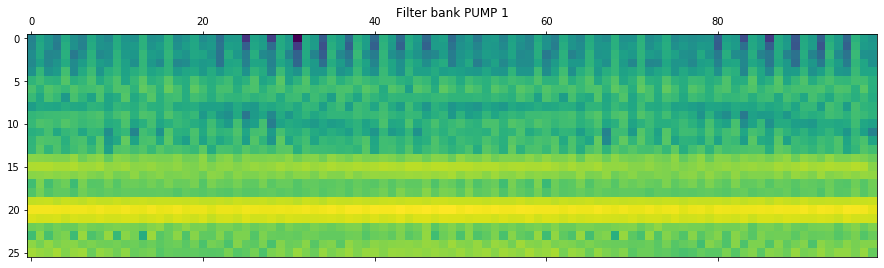

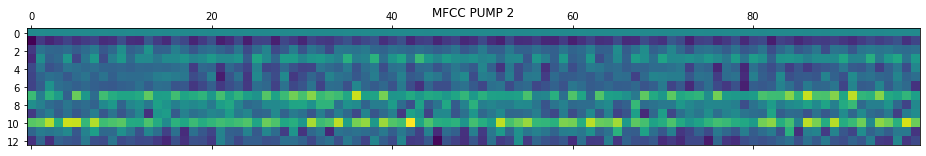

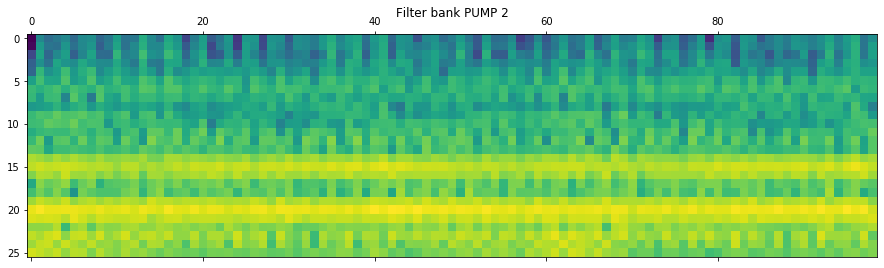

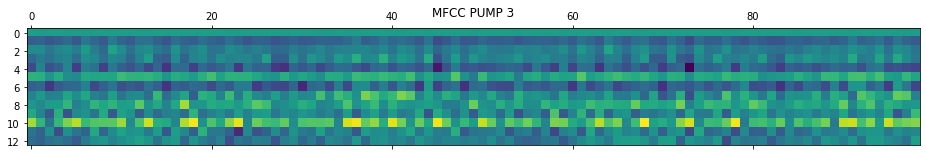

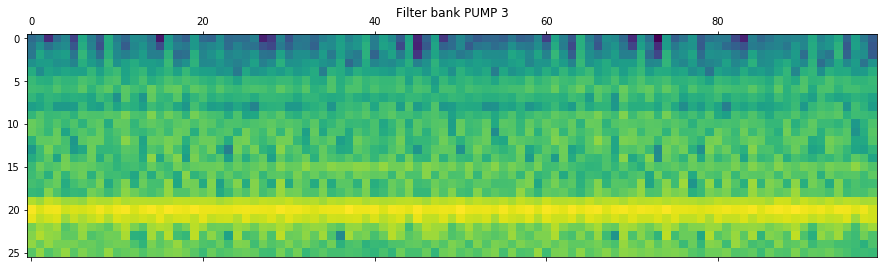

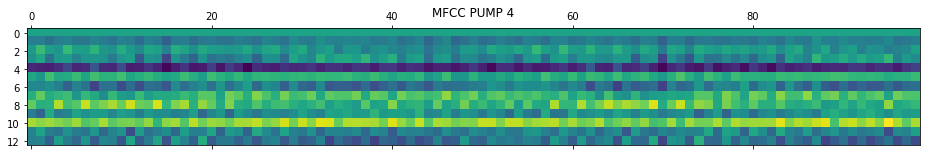

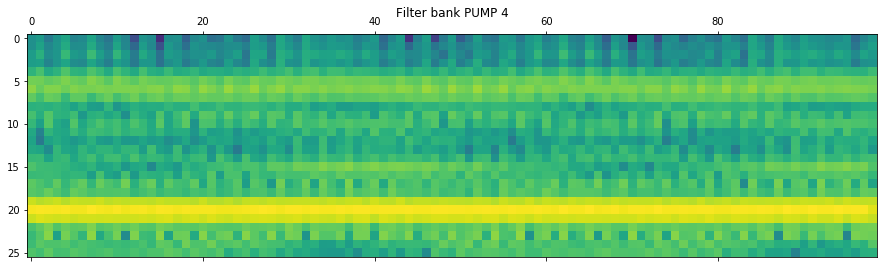

In [5]:
# Extract MFCC and Filter bank features
fs = 1000

mfcc_features1 = mfcc(p1, fs)
mfcc_features2 = mfcc(p2, fs)
mfcc_features3 = mfcc(p3, fs)
mfcc_features4 = mfcc(p4, fs)

filterbank_features1 = logfbank(p1, fs)
filterbank_features2 = logfbank(p2, fs)
filterbank_features3 = logfbank(p3, fs)
filterbank_features4 = logfbank(p4, fs)


# Print parameters
print('\nMFCC:\nNumber of windows P1 =', mfcc_features1.shape[0])
print('\nMFCC:\nNumber of windows P2=', mfcc_features2.shape[0])
print('\nMFCC:\nNumber of windows P3=', mfcc_features3.shape[0])
print('\nMFCC:\nNumber of windows P4=', mfcc_features3.shape[0])

print('Length of each feature  P1=', mfcc_features1.shape[1])
print('Length of each feature  P2 =', mfcc_features2.shape[1])
print('Length of each feature  P3=', mfcc_features3.shape[1])
print('Length of each feature  P4=', mfcc_features4.shape[1])

print('\nFilter bank:\nNumber of windows  P1 =', filterbank_features1.shape[0])
print('\nFilter bank:\nNumber of windows  P2 =', filterbank_features2.shape[0])
print('\nFilter bank:\nNumber of windows  P3 =', filterbank_features3.shape[0])
print('\nFilter bank:\nNumber of windows  P4 =', filterbank_features4.shape[0])

print('Length of each feature  P1 =', filterbank_features1.shape[1])
print('Length of each feature  P2 =', filterbank_features2.shape[1])
print('Length of each feature  P3 =', filterbank_features3.shape[1])
print('Length of each feature  P4 =', filterbank_features4.shape[1])

# Plot the features
mfcc_features1 = mfcc_features1.T
mfcc_features2 = mfcc_features2.T
mfcc_features3 = mfcc_features3.T
mfcc_features4 = mfcc_features4.T

plt.matshow(mfcc_features1, aspect = 'auto')
plt.title('MFCC PUMP 1')
filterbank_features1 = filterbank_features1.T
plt.matshow(filterbank_features1, aspect = 'auto')
plt.title('Filter bank PUMP 1')
plt.show()

plt.matshow(mfcc_features2, aspect = 'auto')
plt.title('MFCC PUMP 2')
filterbank_features2 = filterbank_features2.T
plt.matshow(filterbank_features2, aspect = 'auto')
plt.title('Filter bank PUMP 2')
plt.show()

plt.matshow(mfcc_features3, aspect = 'auto')
plt.title('MFCC PUMP 3')
filterbank_features3 = filterbank_features3.T
plt.matshow(filterbank_features3, aspect = 'auto')
plt.title('Filter bank PUMP 3')
plt.show()

plt.matshow(mfcc_features4, aspect = 'auto')
plt.title('MFCC PUMP 4')
filterbank_features4 = filterbank_features4.T
plt.matshow(filterbank_features4, aspect = 'auto')
plt.title('Filter bank PUMP 4')
plt.show()

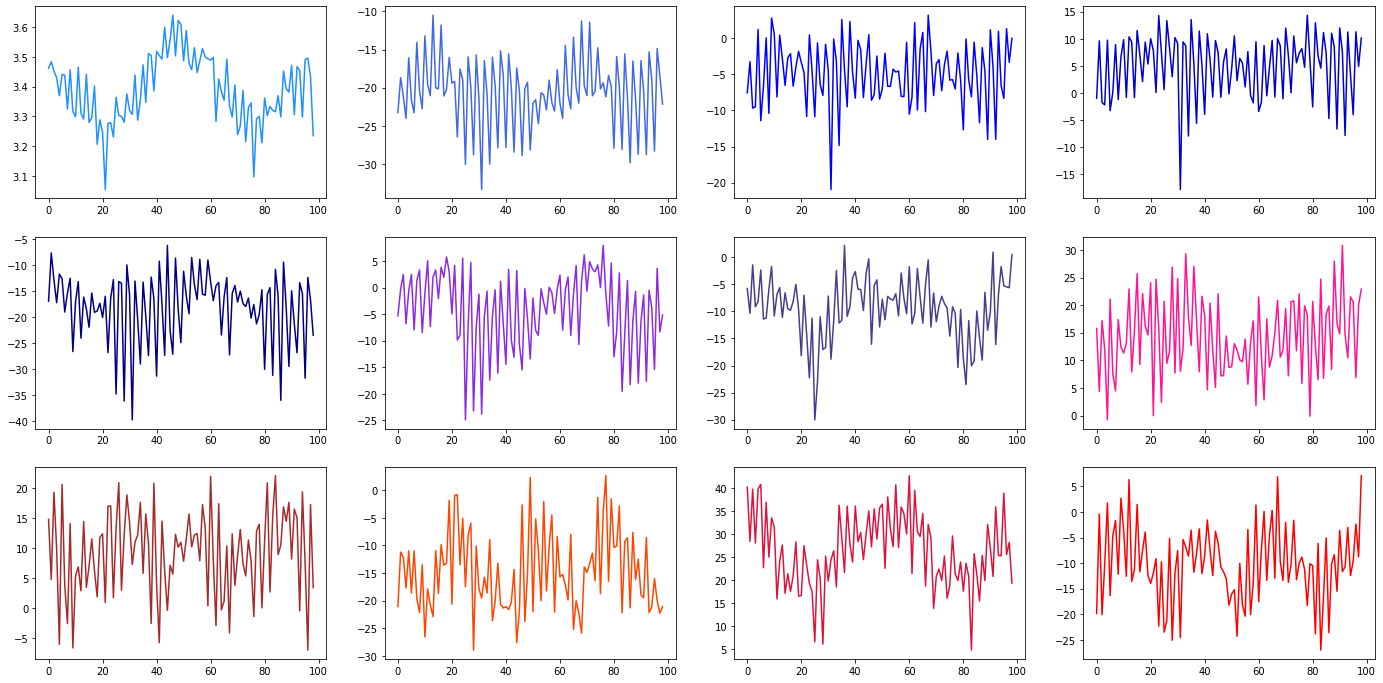

In [32]:
df_mfcc1 = pd.DataFrame(mfcc_features1)
df_mfcc2 = pd.DataFrame(mfcc_features2)
df_mfcc3 = pd.DataFrame(mfcc_features3)
df_mfcc4 = pd.DataFrame(mfcc_features4)

###########################  PUMP 1 MFCC####################
f1 = df_mfcc1.iloc[[0]]
f2 = df_mfcc1.iloc[[1]]
f3 = df_mfcc1.iloc[[2]]
f4 = df_mfcc1.iloc[[3]]
f5 = df_mfcc1.iloc[[4]]
f6 = df_mfcc1.iloc[[5]]
f7 = df_mfcc1.iloc[[6]]
f8 = df_mfcc1.iloc[[7]]
f9 = df_mfcc1.iloc[[8]]
f10 = df_mfcc1.iloc[[9]]
f11 = df_mfcc1.iloc[[10]]
f12 = df_mfcc1.iloc[[11]]
f13 = df_mfcc1.iloc[[12]]

figure, ((ax1, ax2, ax3,ax4), (ax5, ax6, ax7,ax8), (ax9, ax10, ax11,ax12)) =plt.subplots(nrows=3, ncols=4, figsize=(24,12))
#figure.suptitle('MFCC Pump1 (1-12)', fontsize=25, fontweight='bold', color = 'r')
#ax1.title('MFCC 1)
ax1.plot(f1.T, color = 'dodgerblue')
ax2.plot(f2.T, color = 'royalblue')
ax3.plot(f3.T, color = 'b')
ax4.plot(f4.T, color = 'mediumblue')
ax5.plot(f5.T, color = 'navy')
ax6.plot(f6.T, color = 'blueviolet')
ax7.plot(f7.T, color = 'darkslateblue')
ax8.plot(f8.T, color = 'deeppink')
ax9.plot(f9.T, color = 'brown')
ax10.plot(f10.T, color = 'orangered')
ax11.plot(f11.T, color = 'crimson')
ax12.plot(f12.T, color = 'r')

plt.show()

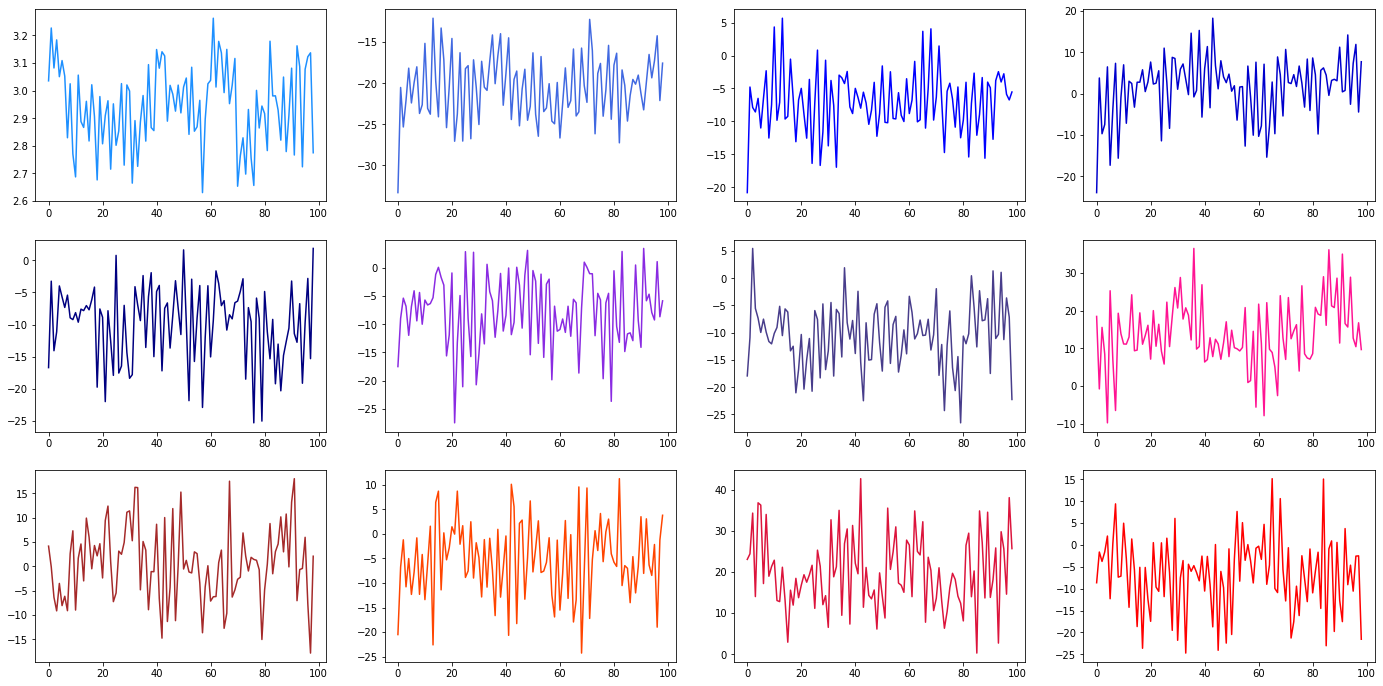

In [7]:
###########################  PUMP 2 MFCC####################
ff1 = df_mfcc2.iloc[[0]]
ff2 = df_mfcc2.iloc[[1]]
ff3 = df_mfcc2.iloc[[2]]
ff4 = df_mfcc2.iloc[[3]]
ff5 = df_mfcc2.iloc[[4]]
ff6 = df_mfcc2.iloc[[5]]
ff7 = df_mfcc2.iloc[[6]]
ff8 = df_mfcc2.iloc[[7]]
ff9 = df_mfcc2.iloc[[8]]
ff10 = df_mfcc2.iloc[[9]]
ff11 = df_mfcc2.iloc[[10]]
ff12 = df_mfcc2.iloc[[11]]
ff13 = df_mfcc2.iloc[[12]]

figure, ((ax1, ax2, ax3,ax4), (ax5, ax6, ax7,ax8), (ax9, ax10, ax11,ax12)) =plt.subplots(3, 4, figsize=(24,12))
#figure.suptitle('MFCC Pump2 (1-12)', fontsize=25, fontweight='bold', color = 'r')
ax1.plot(ff1.T, color = 'dodgerblue')
ax2.plot(ff2.T, color = 'royalblue')
ax3.plot(ff3.T, color = 'b')
ax4.plot(ff4.T, color = 'mediumblue')
ax5.plot(ff5.T, color = 'navy')
ax6.plot(ff6.T, color = 'blueviolet')
ax7.plot(ff7.T, color = 'darkslateblue')
ax8.plot(ff8.T, color = 'deeppink')
ax9.plot(ff9.T, color = 'brown')
ax10.plot(ff10.T, color = 'orangered')
ax11.plot(ff11.T, color = 'crimson')
ax12.plot(ff12.T, color = 'r')

plt.show()

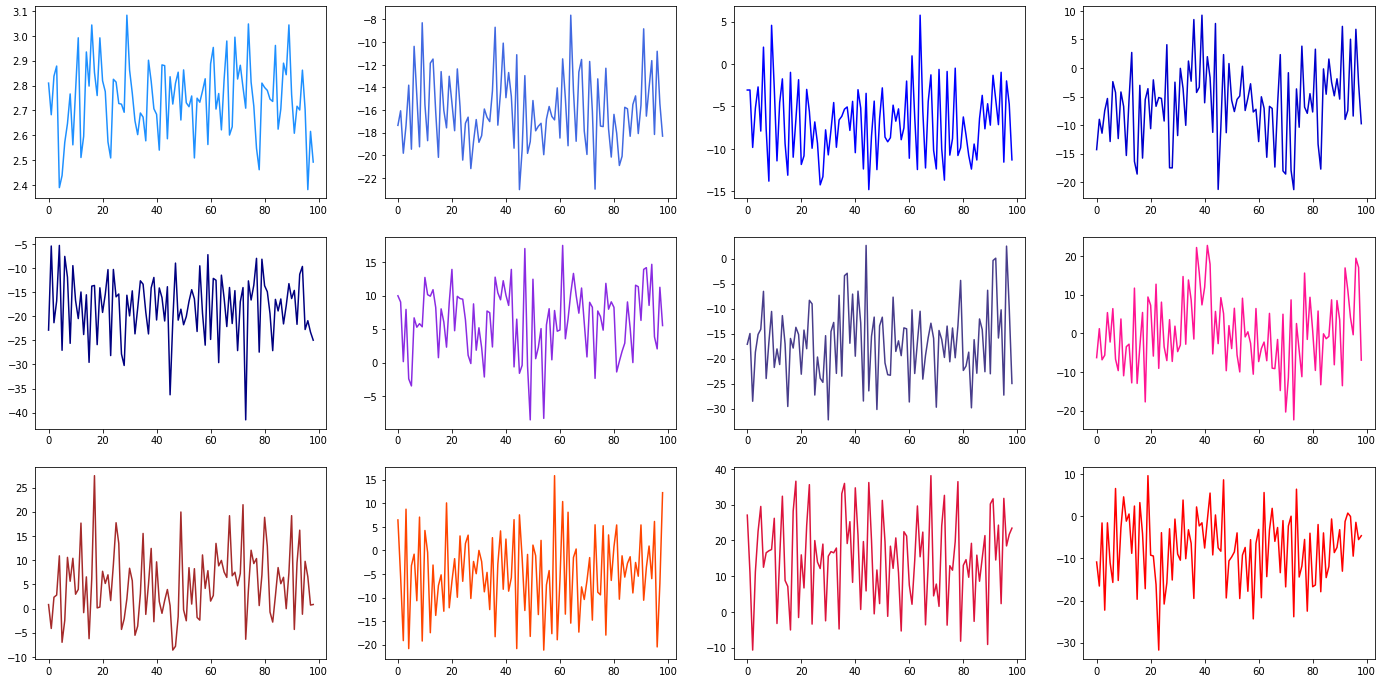

In [33]:
###########################  PUMP 3 MFCC####################
fff1 = df_mfcc3.iloc[[0]]
fff2 = df_mfcc3.iloc[[1]]
fff3 = df_mfcc3.iloc[[2]]
fff4 = df_mfcc3.iloc[[3]]
fff5 = df_mfcc3.iloc[[4]]
fff6 = df_mfcc3.iloc[[5]]
fff7 = df_mfcc3.iloc[[6]]
fff8 = df_mfcc3.iloc[[7]]
fff9 = df_mfcc3.iloc[[8]]
fff10 = df_mfcc3.iloc[[9]]
fff11 = df_mfcc3.iloc[[10]]
fff12 = df_mfcc3.iloc[[11]]
fff13 = df_mfcc3.iloc[[12]]

figure, ((ax1, ax2, ax3,ax4), (ax5, ax6, ax7,ax8), (ax9, ax10, ax11,ax12)) =plt.subplots(3, 4, figsize=(24,12))
#figure.suptitle('MFCC Pump3 (1-12)', fontsize=25, fontweight='bold', color = 'r')
ax1.plot(fff1.T, color = 'dodgerblue')
ax2.plot(fff2.T, color = 'royalblue')
ax3.plot(fff3.T, color = 'b')
ax4.plot(fff4.T, color = 'mediumblue')
ax5.plot(fff5.T, color = 'navy')
ax6.plot(fff6.T, color = 'blueviolet')
ax7.plot(fff7.T, color = 'darkslateblue')
ax8.plot(fff8.T, color = 'deeppink')
ax9.plot(fff9.T, color = 'brown')
ax10.plot(fff10.T, color = 'orangered')
ax11.plot(fff11.T, color = 'crimson')
ax12.plot(fff12.T, color = 'r')

plt.show()

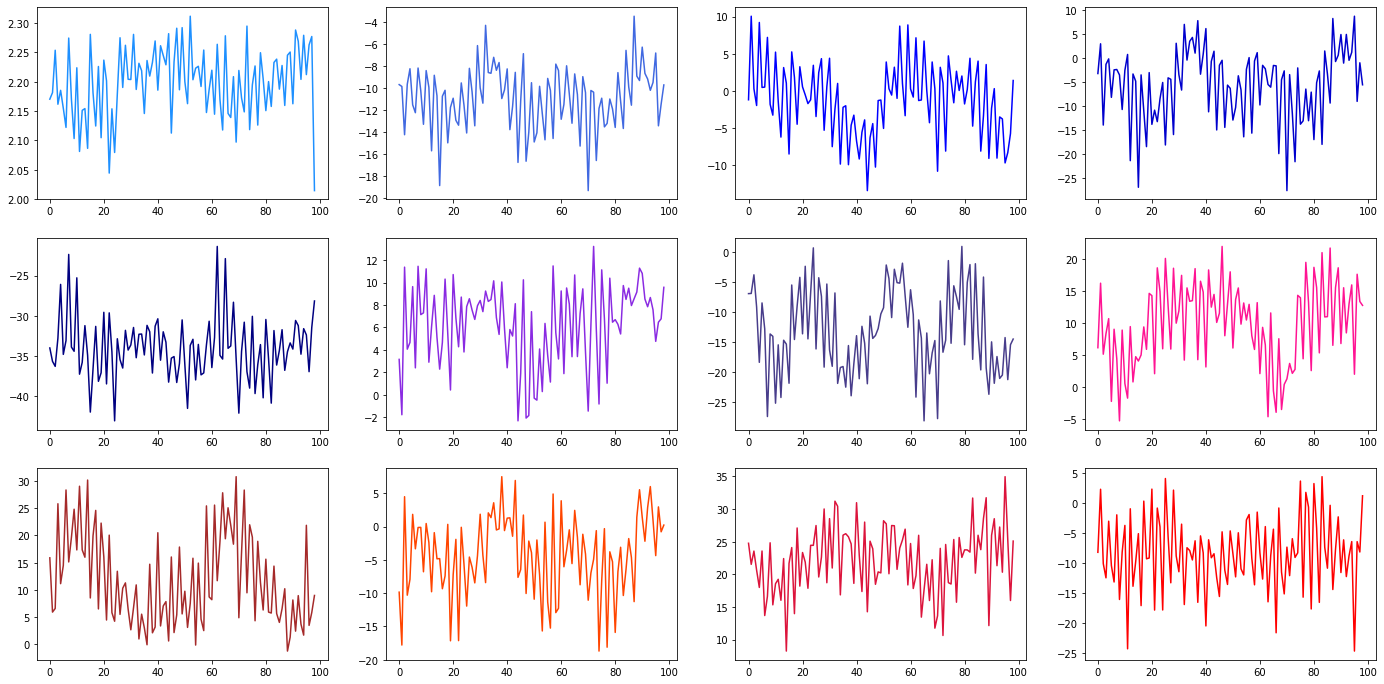

In [34]:
###########################  PUMP 4 MFCC####################
ffff1 = df_mfcc4.iloc[[0]]
ffff2 = df_mfcc4.iloc[[1]]
ffff3 = df_mfcc4.iloc[[2]]
ffff4 = df_mfcc4.iloc[[3]]
ffff5 = df_mfcc4.iloc[[4]]
ffff6 = df_mfcc4.iloc[[5]]
ffff7 = df_mfcc4.iloc[[6]]
ffff8 = df_mfcc4.iloc[[7]]
ffff9 = df_mfcc4.iloc[[8]]
ffff10 = df_mfcc4.iloc[[9]]
ffff11 = df_mfcc4.iloc[[10]]
ffff12 = df_mfcc4.iloc[[11]]
ffff13 = df_mfcc4.iloc[[12]]

figure, ((ax1, ax2, ax3,ax4), (ax5, ax6, ax7,ax8), (ax9, ax10, ax11,ax12)) =plt.subplots(3, 4, figsize=(24,12))
#figure.suptitle('MFCC Pump4 (1-12)', fontsize=25, fontweight='bold', color = 'r')
ax1.plot(ffff1.T, color = 'dodgerblue')
ax2.plot(ffff2.T, color = 'royalblue')
ax3.plot(ffff3.T, color = 'b')
ax4.plot(ffff4.T, color = 'mediumblue')
ax5.plot(ffff5.T, color = 'navy')
ax6.plot(ffff6.T, color = 'blueviolet')
ax7.plot(ffff7.T, color = 'darkslateblue')
ax8.plot(ffff8.T, color = 'deeppink')
ax9.plot(ffff9.T, color = 'brown')
ax10.plot(ffff10.T, color = 'orangered')
ax11.plot(ffff11.T, color = 'crimson')
ax12.plot(ffff12.T, color = 'r')

plt.show()

In [35]:
#if you want to work with the coeficients features
df_mfcc11 = df_mfcc1.T
df_mfcc22 = df_mfcc2.T
df_mfcc33 = df_mfcc3.T
df_mfcc44 = df_mfcc4.T
df_mfcc11.shape

#create a dataframe for each feature with the respective label inside
labelp1 = np.full(shape=len(df_mfcc11),fill_value=0, dtype=np.int)
labelp1 = pd.DataFrame(labelp1)
labelp2 = np.full(shape=len(df_mfcc22),fill_value=1, dtype=np.int)
labelp2 = pd.DataFrame(labelp2)
labelp3 = np.full(shape=len(df_mfcc33),fill_value=2, dtype=np.int)
labelp3 = pd.DataFrame(labelp3)
labelp4 = np.full(shape=len(df_mfcc44),fill_value=3, dtype=np.int)
labelp4 = pd.DataFrame(labelp4)

df_mfcc44.shape

(99, 13)

In [42]:
#concatate all dataframes into one dataframe (INPUT)
df_mfcc_input = [df_mfcc11, df_mfcc22, df_mfcc33, df_mfcc44]
df_mfcc_input= pd.concat(df_mfcc_input)
print('Data input (input for LLE) shape: ',df_mfcc_input.shape)

#concatate all dataframes into one dataframe (label)
df_label = [labelp1, labelp2, labelp3, labelp4]
df_label = pd.concat(df_label)
df_label.columns = ['label']
print('labels of data shape is: ', df_label.shape)
df_label

Data input (input for LLE) shape:  (396, 13)
labels of data shape is:  (396, 1)


,label
0,0
1,0
2,0
3,0
4,0
...,...
94,3
95,3
96,3
97,3


In [60]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

data = df_mfcc_input
data.columns=['MFCC 1','MFCC 2','MFCC 3','MFCC 4','MFCC 5','MFCC 6',
              'MFCC 7','MFCC 8','MFCC 9','MFCC 10','MFCC 11','MFCC 12','MFCC 13',]
data

,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,MFCC 10,MFCC 11,MFCC 12,MFCC 13
0,3.461940,-23.254951,-7.547265,-0.976296,-16.922974,-5.305102,-5.776340,15.781497,14.751795,-21.064587,40.203793,-19.842104,-18.678321
1,3.483755,-18.659592,-3.249231,9.639379,-7.659741,-0.308618,-10.377854,4.397938,4.725014,-11.194647,28.437990,-0.428492,-5.766396
2,3.452053,-21.109381,-9.679012,-1.745222,-12.897265,2.478492,-1.412171,17.200106,19.272922,-12.124923,39.789619,-20.062119,-19.232669
3,3.429890,-24.004058,-9.504319,-2.208107,-17.219821,-6.810479,-9.143350,11.948966,9.763357,-17.697970,28.078701,-10.246071,-6.528031
4,3.369581,-16.086043,1.201316,9.760562,-11.717727,-0.629508,-8.203158,-0.764446,-6.089304,-10.980351,39.861890,1.737229,-14.273005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.278921,-9.513805,-3.821123,1.246763,-31.636355,7.561595,-20.560070,15.918562,1.687806,0.942260,20.309694,-6.449498,-19.635130
95,2.211997,-6.841520,-9.755990,8.762074,-32.418585,4.757658,-14.302152,1.961018,21.862825,-4.372975,34.941104,-24.748847,-13.025956
96,2.262532,-13.458328,-8.359308,-8.987472,-37.011133,6.464462,-21.330317,17.584048,3.473718,2.950088,25.231154,-6.459142,-25.126292
97,2.276837,-11.489575,-5.792353,-0.943524,-31.480279,6.765730,-15.490667,13.326093,5.846890,-0.791992,15.974244,-8.186890,-16.870569


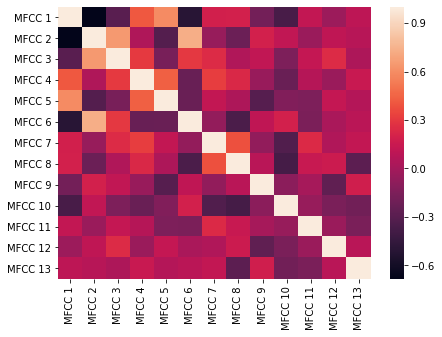

In [44]:
#Generating the correlation matrix
corr = data.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr)

In [41]:
#data2 = data


#data2['label'] = df_label.values
#sns.pairplot(data2, hue='label');

In [49]:
from sklearn import manifold
from sklearn import decomposition

X = data.values
clf = manifold.LocallyLinearEmbedding(n_neighbors=50, n_components=2,method = 'standard', reg = 0.01, 
                                      eigen_solver = 'auto', max_iter = 100, 
                                      tol= 1e-06, hessian_tol = 0.0001, modified_tol = 1e-12, 
                                      neighbors_algorithm = 'auto', random_state=None, n_jobs=1)  #define hyperparameters

z = clf.fit(X)
X_lle = clf.transform(X)

#plot defined embeddings
%matplotlib inline
from matplotlib import offsetbox

y = df_label['label'].values

print('shape of input data is: ', X.shape)
print('LLE output shape is: ',X_lle.shape)
print('label shape: ', y.shape)


shape of input data is:  (396, 13)
LLE output shape is:  (396, 2)
label shape:  (396,)


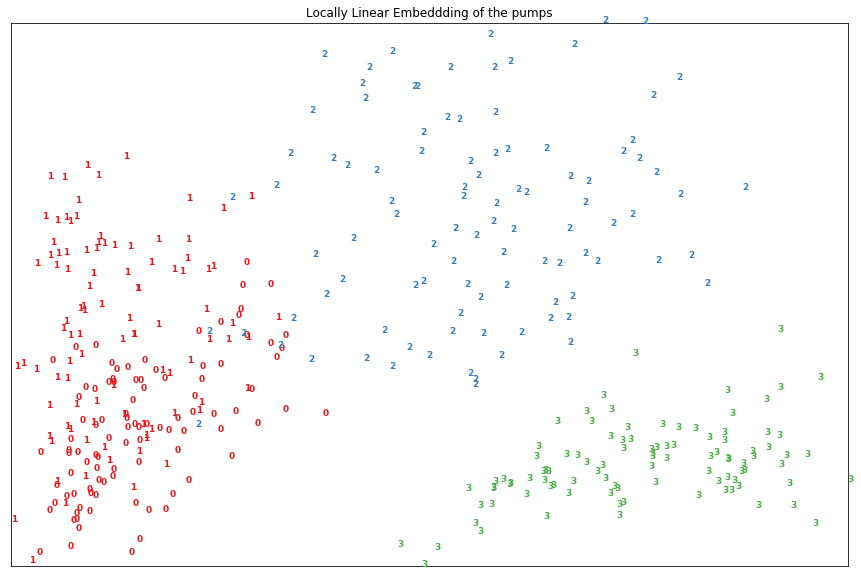

In [50]:
#scale and visualise the embedding vectors
def plot_embedding(X, title=None):
    
    x_min, x_max = np.min(X,0), np.max(X,0) #normalise the data
    X = (X - x_min) / (x_max - x_min)
    
    
    plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i, 1], str(y[i]),
            color = plt.cm.Set1(y[i]/10),
            fontdict = {'weight': 'bold', 'size': 9})
        
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        plt.title(title)



plot_embedding(X_lle, 'Locally Linear Embeddding of the pumps')

In [18]:
#split data into Test and Train (Randomly)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lle, y, test_size=0.3, random_state=0) #choose X_pca or X_lle

print('Training Input shape: ',X_train.shape)
print('Training label shape: ',y_train.shape)
print('Testing Input shape: ',X_test.shape)
print('Testing Label shape: ',y_test.shape)

y

Training Input shape:  (277, 2)
Training label shape:  (277,)
Testing Input shape:  (119, 2)
Testing Label shape:  (119,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,

In [51]:
%matplotlib inline
print(__doc__)
from sklearn import svm
from sklearn.svm import SVC
#CROSS validation
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



Automatically created module for IPython interactive environment


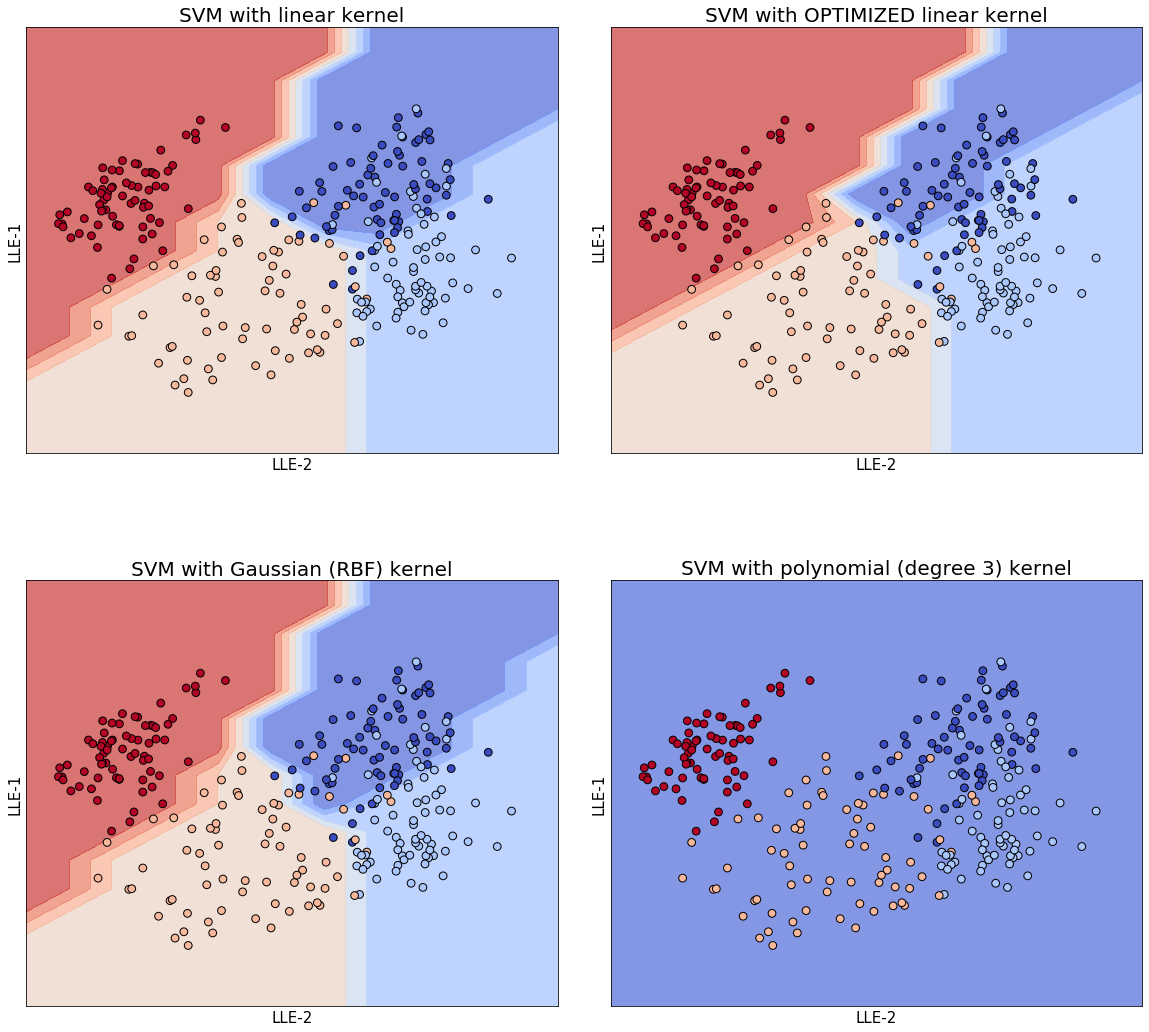

In [52]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 15000  # SVM regularization parameter
#gamma = 20

#C = 75000
#gamma = 5000
gamma = 'auto'

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=gamma, C=C),
          svm.SVC(kernel='poly', degree=4, gamma='auto', C=C))
train_model = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVM with linear kernel',
         'SVM with OPTIMIZED linear kernel',
          'SVM with Gaussian (RBF) kernel',
         'SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(20,18))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(train_model, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=60, edgecolors='k')
    
    
    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(-0.15, 0.15)
    ax.set_xlabel('LLE-2',  fontsize = 15)
    ax.set_ylabel('LLE-1',  fontsize = 15)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 20)

plt.show()

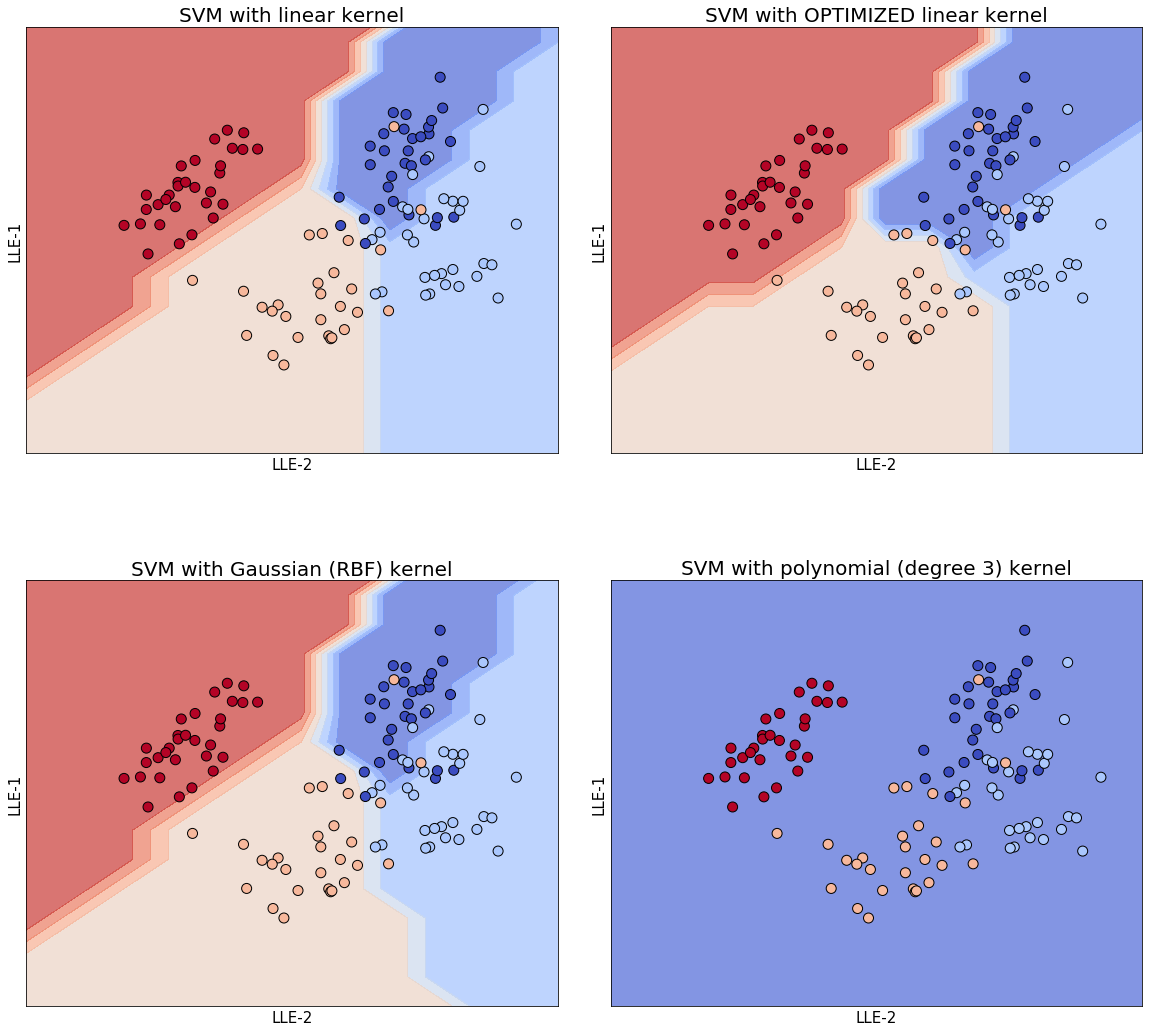

In [53]:
#plot the test results
test_model = (clf.fit(X_test, y_test) for clf in models)

# title for the plots
titles = ('SVM with linear kernel',
          'SVM with OPTIMIZED linear kernel',
          'SVM with Gaussian (RBF) kernel',
          'SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(20,18))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(test_model, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
    
    
    ax.set_xlim(-0.14, 0.1)
    ax.set_ylim(-0.16, 0.13)
    ax.set_xlabel('LLE-2',  fontsize = 15)
    ax.set_ylabel('LLE-1',  fontsize = 15)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 20)

plt.show()

In [56]:
clf_SVC = SVC(kernel='rbf', gamma=gamma, C=C)
clf_SVC = clf_SVC.fit(X_train, y_train)

print('Accuracy of SVC (gaussian Kernel) on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

#Test Accuracy
print('Accuracy of SVC (gaussian Kernel) on Test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

#get predicted output of SVM mODEL
y_pred = clf_SVC.predict(X_test)


Accuracy of SVC (gaussian Kernel) on training set: 88.09
Accuracy of SVC (gaussian Kernel) on Test set: 85.71


In [23]:
#'The cross-validation is an important concept in machine learning. 
#we split the data into training and testing datasets. 
#However, in order to make it more robust, we need to repeat this process with different subsets. 
#If we just fine-tune it for a particular subset, we may end up overfitting the model. 
#Overfitting refers to a situation where we fine-tune a model too much to a dataset and it fails to perform well on unknown data. 
#We want our machine learning model to perform well on unknown data.

num_validations = 10
cv_results = cross_validate(clf_SVC, X_lle, y, cv=num_validations)
#print(sorted(cv_results.keys()))
print(cv_results['test_score'])

[0.9        0.95       0.9        0.8        0.75       0.825
 0.925      0.9        0.825      0.83333333]


In [55]:
#compute the Recall, F1 etc
from sklearn import preprocessing
f1 = cross_validate(clf_SVC, X_lle, y, scoring='f1_weighted', cv=num_validations)
f1 = pd.DataFrame(f1)
print("F1: " + str(round(100*f1.mean(), 2)) + "%")

precision = cross_validate(clf_SVC, X_lle, y, scoring='precision_weighted', cv=num_validations)
precision = pd.DataFrame(precision)
print("\nPrecision: " + str(round(100*precision.mean(), 2)) + "%")

recall = cross_validate(clf_SVC, X_lle, y, scoring='recall_weighted', cv=num_validations)
recall = pd.DataFrame(recall)
print("\nRecall: " + str(round(100*recall.mean(), 2)) + "%") 


from sklearn.metrics import classification_report
target_names = ['Conatiminated Fluid', 'Heavy Fluid', 'Filter Clogging', 'Healthy']
print(classification_report(y_test, y_pred, target_names=target_names))

F1: fit_time        0.22
score_time      0.06
test_score     85.60
train_score    86.88
dtype: float64%

Precision: fit_time        0.25
score_time      0.06
test_score     88.03
train_score    88.50
dtype: float64%

Recall: fit_time        0.23
score_time      0.09
test_score     85.81
train_score    86.90
dtype: float64%
                     precision    recall  f1-score   support

Conatiminated Fluid       0.76      0.84      0.80        31
        Heavy Fluid       0.84      0.70      0.76        30
    Filter Clogging       0.83      0.89      0.86        28
            Healthy       1.00      1.00      1.00        30

          micro avg       0.86      0.86      0.86       119
          macro avg       0.86      0.86      0.86       119
       weighted avg       0.86      0.86      0.86       119



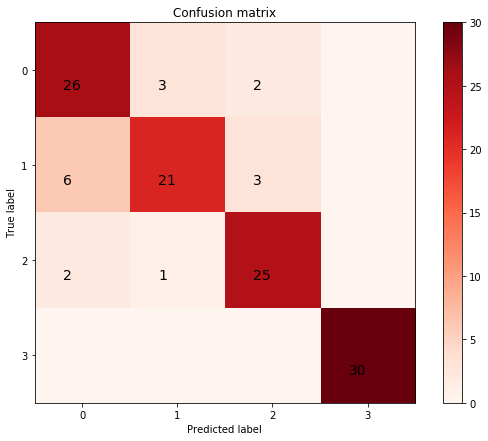

In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Show confusion matrix
def plot_confusion_matrix(confusion_mat):
    plt.figure(figsize=(10,7))
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('Confusion matrix')
    for i, cas in enumerate(confusion_mat):
        for j, c in enumerate(cas):
            if c>0:
                plt.text(j-.2, i+.2, c, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label', fontsize =10)
    plt.xlabel('Predicted label', fontsize =10)
    plt.show()

confusion_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mat)
